# Manipulation of Airbnb Data

# Data Inspection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import psycopg2
from pwdAs import passwd

In [2]:
df = pd.read_csv('listings.csv')

In [3]:
df.head(1)

id                        listing_url       scrape_id last_scraped  \
0  5396  https://www.airbnb.com/rooms/5396  20230313171257   2023-03-14   

        source                            name  \
0  city scrape  Explore the heart of old Paris   

                                         description  \
0  Cozy, well-appointed and graciously designed s...   

                               neighborhood_overview  \
0  You are within walking distance to the Louvre,...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/52413/f9bf76f...     7903  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.83                   4.95                4.54   

         license instant_bookable calculated_host_listings_count  \
0  7510402838018                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              1.99  

[1 rows x 75 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56726 entries, 0 to 56725
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            56726 non-null  int64  
 1   listing_url                                   56726 non-null  object 
 2   scrape_id                                     56726 non-null  int64  
 3   last_scraped                                  56726 non-null  object 
 4   source                                        56726 non-null  object 
 5   name                                          56689 non-null  object 
 6   description                                   56161 non-null  object 
 7   neighborhood_overview                         32447 non-null  object 
 8   picture_url                                   56725 non-null  object 
 9   host_id                                       56726 non-null 

In [5]:
df.describe()

id     scrape_id       host_id  host_listings_count  \
count  5.672600e+04  5.672600e+04  5.672600e+04         56708.000000   
mean   1.973188e+17  2.023031e+13  1.295704e+08            21.893948   
std    3.209526e+17  0.000000e+00  1.547738e+08            93.175233   
min    5.396000e+03  2.023031e+13  2.750000e+02             1.000000   
25%    1.629361e+07  2.023031e+13  1.537846e+07             1.000000   
50%    3.663390e+07  2.023031e+13  4.925020e+07             1.000000   
75%    5.978393e+17  2.023031e+13  2.125869e+08             3.000000   
max    8.463336e+17  2.023031e+13  5.049987e+08          2139.000000   

       host_total_listings_count  neighbourhood_group_cleansed      latitude  \
count               56708.000000                           0.0  56726.000000   
mean                   32.803238                           NaN     48.864290   
std                   143.030468                           NaN      0.018055   
min                     1.000000                           NaN     48.816080   
25%                     1.000000                           NaN     48.851310   
50%                     2.000000                           NaN     48.865590   
75%                     4.000000                           NaN     48.878690   
max                  3629.000000                           NaN     48.901670   

          longitude  accommodates  bathrooms  ...  review_scores_cleanliness  \
count  56726.000000  56726.000000        0.0  ...               45112.000000   
mean       2.344470      3.048919        NaN  ...                   4.589212   
std        0.033243      1.611676        NaN  ...                   0.519631   
min        2.235490      0.000000        NaN  ...                   0.000000   
25%        2.323630      2.000000        NaN  ...                   4.440000   
50%        2.347680      2.000000        NaN  ...                   4.740000   
75%        2.368830      4.000000        NaN  ...                   4.950000   
max        2.467120     16.000000        NaN  ...                   5.000000   

       review_scores_checkin  review_scores_communication  \
count           45099.000000                 45109.000000   
mean                4.786115                     4.800066   
std                 0.401047                     0.396593   
min                 0.000000                     0.000000   
25%                 4.750000                     4.750000   
50%                 4.910000                     4.940000   
75%                 5.000000                     5.000000   
max                 5.000000                     5.000000   

       review_scores_location  review_scores_value  \
count            45097.000000         45095.000000   
mean                 4.799382             4.590021   
std                  0.344041             0.470871   
min                  0.000000             0.000000   
25%                  4.750000             4.470000   
50%                  4.900000             4.700000   
75%                  5.000000             4.880000   
max                  5.000000             5.000000   

       calculated_host_listings_count  \
count                    56726.000000   
mean                        15.104643   
std                         51.584652   
min                          1.000000   
25%                          1.000000   
50%                          1.000000   
75%                          2.000000   
max                        447.000000   

       calculated_host_listings_count_entire_homes  \
count                                 56726.000000   
mean                                     14.330748   
std                                      51.453338   
min                                       0.000000   
25%                                       1.000000   
50%                                       1.000000   
75%                                       1.000000   
max                                     447.000000   

       calculated_host_listings_

In [6]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [7]:
df.shape

(56726, 75)

# Cleaning Data

### Select column to exploit 

In [8]:
df1 = df[['id','listing_url','name','description','neighborhood_overview','host_id','host_url','host_name','neighbourhood_cleansed','latitude','longitude','room_type','price','minimum_nights','minimum_nights','availability_365','number_of_reviews','last_review','calculated_host_listings_count','reviews_per_month']].copy()
df1.head(1)

id                        listing_url                            name  \
0  5396  https://www.airbnb.com/rooms/5396  Explore the heart of old Paris   

                                         description  \
0  Cozy, well-appointed and graciously designed s...   

                               neighborhood_overview  host_id  \
0  You are within walking distance to the Louvre,...     7903   

                                 host_url host_name neighbourhood_cleansed  \
0  https://www.airbnb.com/users/show/7903    Borzou         Hôtel-de-Ville   

   latitude  longitude        room_type    price  minimum_nights  \
0  48.85247    2.35835  Entire home/apt  $124.00              15   

   minimum_nights  availability_365  number_of_reviews last_review  \
0              15               184                332  2023-02-18   

   calculated_host_listings_count  reviews_per_month  
0                               1               1.99

### show how many NaN values

In [9]:
df1.isna().sum()

id                                    0
listing_url                           0
name                                 37
description                         565
neighborhood_overview             24279
host_id                               0
host_url                              0
host_name                            18
neighbourhood_cleansed                0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
minimum_nights                        0
availability_365                      0
number_of_reviews                     0
last_review                       11095
calculated_host_listings_count        0
reviews_per_month                 11095
dtype: int64

### last_review Data transformation into datetime

In [10]:
df1['last_review']

0        2023-02-18
1        2023-03-15
2        2015-09-14
3               NaN
4        2022-10-21
            ...    
56721           NaN
56722           NaN
56723           NaN
56724           NaN
56725           NaN
Name: last_review, Length: 56726, dtype: object

In [11]:
df1['last_review'] = pd.to_datetime(df1['last_review'])
df1['last_review']

0       2023-02-18
1       2023-03-15
2       2015-09-14
3              NaT
4       2022-10-21
           ...    
56721          NaT
56722          NaT
56723          NaT
56724          NaT
56725          NaT
Name: last_review, Length: 56726, dtype: datetime64[ns]

### replace NaN value by max value in last_review

In [12]:
df1['last_review'] = df1['last_review'].fillna(df1['last_review'].max())
df1['last_review']

0       2023-02-18
1       2023-03-15
2       2015-09-14
3       2023-03-26
4       2022-10-21
           ...    
56721   2023-03-26
56722   2023-03-26
56723   2023-03-26
56724   2023-03-26
56725   2023-03-26
Name: last_review, Length: 56726, dtype: datetime64[ns]

### Replace NaN in reviews_per_month by 0

In [13]:
df1['reviews_per_month'] = df1['reviews_per_month'].fillna(0)
df1['reviews_per_month']

0        1.99
1        2.26
2        0.04
3        0.00
4        0.35
         ... 
56721    0.00
56722    0.00
56723    0.00
56724    0.00
56725    0.00
Name: reviews_per_month, Length: 56726, dtype: float64

### replace NaN value in name, host_name, description, neighbourhood_overview and neighbourhood with ""

In [14]:
arraytofil = ['name', 'host_name', 'description', 'neighborhood_overview', 'neighbourhood_cleansed']
df1[arraytofil] = df1[arraytofil].fillna("")

 ### Check if all NaN as been replaced

In [15]:
df1.isna().sum()

id                                0
listing_url                       0
name                              0
description                       0
neighborhood_overview             0
host_id                           0
host_url                          0
host_name                         0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
minimum_nights                    0
availability_365                  0
number_of_reviews                 0
last_review                       0
calculated_host_listings_count    0
reviews_per_month                 0
dtype: int64

### Cleaning col Price for remove '$' 

In [16]:
df1['price'] = df1['price'].str.replace('$', "")
df1['price']

0        124.00
1        130.00
2        140.00
3         75.00
4        160.00
          ...  
56721    640.00
56722    538.00
56723    600.00
56724    181.00
56725    300.00
Name: price, Length: 56726, dtype: object

### Add new col for getting night reserved on year in reserved_365

In [17]:
df1['reserved_365'] = (365 - df1['availability_365'])
df1.head(1)

id                        listing_url                            name  \
0  5396  https://www.airbnb.com/rooms/5396  Explore the heart of old Paris   

                                         description  \
0  Cozy, well-appointed and graciously designed s...   

                               neighborhood_overview  host_id  \
0  You are within walking distance to the Louvre,...     7903   

                                 host_url host_name neighbourhood_cleansed  \
0  https://www.airbnb.com/users/show/7903    Borzou         Hôtel-de-Ville   

   latitude  ...        room_type   price  minimum_nights  minimum_nights  \
0  48.85247  ...  Entire home/apt  124.00              15              15   

   availability_365  number_of_reviews  last_review  \
0               184                332   2023-02-18   

  calculated_host_listings_count  reviews_per_month  reserved_365  
0                              1               1.99           181  

[1 rows x 21 columns]


# Analyze Data

### How many host does we have ?

In [18]:
df1['host_id'].nunique()

42490

### Show the top 10 host with the most of listing by ID

In [19]:
top_hosts = df1['host_id'].value_counts().nlargest(10)
top_hosts

host_id
314994947    447
50978178     230
50502817     214
7642792      196
440295601    195
33889201     182
458533553    165
26981054     156
402191311    141
6053288      131
Name: count, dtype: int64

### Show the top 10 host with the most of listing by ID name

In [20]:
top_host = df1.groupby(['host_id','host_name'])['host_id'].value_counts().nlargest(10)
top_host

host_id    host_name       
314994947  Blueground          447
50978178   Sebastien           230
50502817   Pierre De WeHost    214
7642792    Ludovic             196
440295601  Gaelle              195
33889201   Veeve               182
458533553  Joffrey             165
26981054   Cédric              156
402191311  GuestReady          141
6053288    Anna                131
Name: count, dtype: int64

### Show all listing of the top 10

In [21]:
top_hosts_df = df1[df1['host_id'].isin(top_hosts.index)]

In [22]:
top_hosts_df

id                                      listing_url  \
190                 52931               https://www.airbnb.com/rooms/52931   
662                810543              https://www.airbnb.com/rooms/810543   
966               1022819             https://www.airbnb.com/rooms/1022819   
1323              1430881             https://www.airbnb.com/rooms/1430881   
1366              1452226             https://www.airbnb.com/rooms/1452226   
...                   ...                                              ...   
56661  846322669044068092  https://www.airbnb.com/rooms/846322669044068092   
56672  846329760591558172  https://www.airbnb.com/rooms/846329760591558172   
56673  846332777690107540  https://www.airbnb.com/rooms/846332777690107540   
56676  846333585388413037  https://www.airbnb.com/rooms/846333585388413037   
56712  844680838536598952  https://www.airbnb.com/rooms/844680838536598952   

                                                   name  \
190    Charming apt in the 17th of Paris - Terrace 25m2   
662       GuestReady - Spacious Bright flat near Louvre   
966               ✹Cocoon in the center of Montmartere✹   
1323                Fleur de Rosiers, 1BR/1BA, 3 people   
1366                Parfum d'Histoire, 3BR/1BA 6 people   
...                                                 ...   
56661        Ternes 1br w/ elevator, nr Arc de Triomphe   
56672   Trocadero 3br w/ balcony, nr Place du Trocadéro   
56673        Trocadéro 2br w/ elevator, nr Eiffel Tower   
56676    Champs Elysées 2br w/ balcony, nr Montaigne St   
56712                  Old apartment for 4 - Paris 20 E   

                                             description  \
190    I will be delighted to welcome you to my charm...   
662    This chic 1 bedroom apartment in the trendy 1s...   
966    The accommodation can accommodate two people w...   
1323   28 square meters apartment on the third floor ...   
1366   Beautiful apartment of 62 m2 floor, with two b...   
...                                                  ...   
56661  Show up and start living from day one in Paris...   
56672  Show up and start living from day one in Paris...   
56673  Show up and start living from day one in Paris...   
56676  Discover the best of Paris, with this two-bedr...   
56712  Travelers particularly appreciated this accomm...   

                                   neighborhood_overview    host_id  \
190    In some streets, Les Épinettes has also become...   50502817   
662    The apartment is perfectly located in the hear...  402191311   
966    A very quiet place in the heart of a very busy...   50502817   
1323   Le Marais, it's the festive, fashion, artistic...    7642792   
1366   Le Marais, it's the festive, fashion, artistic...    7642792   
...                                                  ...        ...   
56661  This neighborhood takes its name from the Plac...  314994947   
56672  Within the borders of the 16th, Trocadéro host...  314994947   
56673  Within the borders of the 16th, Trocadéro host...  314994947   
56676  One of Paris’s best-loved monuments, the histo...  314994947   
56712  The Père-Lachaise Saint Frageau district is a ...    6053288   

                                          host_url         host_name  \
190     https://www.airbnb.com/users/show/50502817  Pierre De WeHost   
662    https://www.airbnb.com/users/show/402191311        GuestReady   
966     https://www.airbnb.com/users/show/50502817  Pierre De WeHost   
1323     https://www.airbnb.com/users/show/7642792           Ludovic   
1366     https://www.airbnb.com/users/show/7642792           Ludovic   
...                                            ...               ...   
56661  https://www.airbnb.com/users/show/314994947        Blueground   
56672  https://www.airbnb.com/users/show/314994947        Blueground   
56673  https://www.airbnb.com/users/show/314994947        Blueground   
56676  https://www.airbnb.com/users/show/314994947        Blueground   
56712    ht

### Getting ID of top 1 who's having most listing

In [23]:
highestListing = df1['host_id'].value_counts().idxmax()
highestListing

314994947

### Getting neighborhood in Paris

In [24]:
df1['neighbourhood_cleansed'].unique()

array(['Hôtel-de-Ville', 'Opéra', 'Louvre', 'Popincourt',
       'Buttes-Montmartre', 'Luxembourg', 'Gobelins', 'Entrepôt',
       'Batignolles-Monceau', 'Temple', 'Buttes-Chaumont', 'Bourse',
       'Ménilmontant', 'Observatoire', 'Panthéon', 'Vaugirard', 'Élysée',
       'Reuilly', 'Passy', 'Palais-Bourbon'], dtype=object)

### Getting listing types

In [25]:
df1['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

### Show the top 10 listing with the most of reviews

In [26]:
largestReview = df1.nlargest(10, 'number_of_reviews' )

In [27]:
largestReview

id                            listing_url  \
21647  26244787  https://www.airbnb.com/rooms/26244787   
14749  17222007  https://www.airbnb.com/rooms/17222007   
31468  41020735  https://www.airbnb.com/rooms/41020735   
26941  35145338  https://www.airbnb.com/rooms/35145338   
30717  40194697  https://www.airbnb.com/rooms/40194697   
25092  32518543  https://www.airbnb.com/rooms/32518543   
768      846954    https://www.airbnb.com/rooms/846954   
24946  32057469  https://www.airbnb.com/rooms/32057469   
1272    1249964   https://www.airbnb.com/rooms/1249964   
27199  35242476  https://www.airbnb.com/rooms/35242476   

                                                    name  \
21647  Double/Twin Room, close to Opera and the Louvr...   
14749    Sweet & cosy room next to Canal Saint Martin ❤️   
31468       Bed in Dorm of 8 Beds "The Big One" in Paris   
26941                             Nice Room for 2 people   
30717  Comfortable bed in shared rooms of 8 in Paris 12e   
25092     Hotel Boronali *** - Double room in Montmartre   
768    Gde chambre ds grand appart. Salle de bain privée   
24946             Sweet Little Room near St Martin Canal   
1272                   A Journey Into The Heart Of Paris   
27199                                Superb room for two   

                                             description  \
21647  <b>The space</b><br />The Daunou Opera enjoys ...   
14749  The room is located right in the heart of la R...   
31468  Welcome to Les Piaules, our hostel & bar in do...   
26941  Hotel de l'Aqueduc is located near the center ...   
30717  Kick your journey off with a coffee on the 8th...   
25092  Book this room, and discover the historical Pa...   
768    Chambre 20 m2 dans appartement spacieux (120 m...   
24946  Welcome to Hotel Tilde!<br />Prepared for you!...   
1272   You are looking for a private and whole apartm...   
27199  In order to guarantee the room, a pre-authoriz...   

                                   neighborhood_overview    host_id  \
21647                                                      98020850   
14749  The room I offer is right in the middle of a v...   84901734   
31468  Les Piaules hostel is located in Paris arty & ...  315206797   
26941                                                     264483496   
30717  Make your stay a magic, cocooning and romantic...  309707704   
25092  Occupied since Gallo-Roman times, Montmartre h...   98087989   
768    Il est animé, "parisien", près du centre, très...    3125405   
24946  In the 19th arrondissement of Paris, the hotel...  183489963   
1272   The 1st district in which abounds most monumen...    6811343   
27199  The Europe Saint-Séverin Paris Notre-Dame hote...  264941340   

                                          host_url               host_name  \
21647   https://www.airbnb.com/users/show/98020850                  Lionel   
14749   https://www.airbnb.com/users/show/84901734               Alexandra   
31468  https://www.airbnb.com/users/show/315206797             Les Piaules   
26941  https://www.airbnb.com/users/show/264483496      Hotel De L’Aqueduc   
30717  https://www.airbnb.com/users/show/309707704  The People Paris Bercy   
25092   https://www.airbnb.com/users/show/98087989                  Arthur   
768      https://www.airbnb.com/users/show/3125405                   Maguy   
24946  https://www.airbnb.com/users/show/183489963                    Naïm   
1272     https://www.airbnb.com/users/show/6811343                    Mike   
27199  https://www.airbnb.com/users/show/264941340                  Marine   

      neighbourhood_cleansed  latitude  ...     room_type   price  \
21647                 Bourse  48.86958  ...    Hotel room  364.00   
14749               Entrepôt  48.86989  ...  Private room  147.00   
31468             Popincourt  48.86998  ...   Shared room   41.00   
26941               Entrepôt  48.88137  ...    Hotel room  124.00   
30717                Reuilly  48.83903  ...   Shared room   42.00 

### Create new col annual_Income

In [28]:
df1['price'] = df1['price'].str.replace(',', '')
df1['price'] = pd.to_numeric(df1['price'])
df1['annual_income'] = df1['price'] * df1['reserved_365']
df1.head(1)

id                        listing_url                            name  \
0  5396  https://www.airbnb.com/rooms/5396  Explore the heart of old Paris   

                                         description  \
0  Cozy, well-appointed and graciously designed s...   

                               neighborhood_overview  host_id  \
0  You are within walking distance to the Louvre,...     7903   

                                 host_url host_name neighbourhood_cleansed  \
0  https://www.airbnb.com/users/show/7903    Borzou         Hôtel-de-Ville   

   latitude  ...  price  minimum_nights  minimum_nights  availability_365  \
0  48.85247  ...  124.0              15              15               184   

   number_of_reviews  last_review  calculated_host_listings_count  \
0                332   2023-02-18                               1   

  reviews_per_month  reserved_365  annual_income  
0              1.99           181        22444.0  

[1 rows x 22 columns]

### Getting the 20 Listing making most profit annualy

In [29]:
top20 = df1.nlargest(20, 'annual_income')
top20[['id', 'name', 'host_id', 'host_name', 'price', 'reserved_365', 'annual_income']]

id                                               name  \
34264            44587494   Citadines Tour Eiffel Paris, Eiffel Tower Studio   
25964            33521511    Studio moderne 34 m2 + Balcon à Paris 15 -Javel   
41290  557849127896979136   Charming Apartment 3BR/6P - Convention/Serres -2   
42690  598345674662965219  Charming apartment - 1BR/4P - Bercy / Accor Arena   
43302  615781188493141230  Charming apartment - 2BR/8P - Bercy / Accor Arena   
34002            44218823    Modern Furnished Apartment Near Metro and Paris   
7605              7810360                "Peace and Light in Heart of Paris"   
31923            41682013   Appartement 6-7 pers. Près du canal Saint-Martin   
271                243040                Apart Hotel / Paris Opera Madeleine   
8165              8584192                           ✨✨✨✨ Paris //Monceau✨✨✨✨   
46152  662995681250893197      Paris : joli 2 pièces /studio duplex Bastille   
48510  701870599684429320   Cosy apartment 4 Br 8 P Opera Galeries Lafayette   
52710  780399078200229165  Luxurious Haussmannian apartment 3BR Saint-Ger...   
20907            25649477  ⭐Chic Parisian 2-rooms Apartment  - Close to m...   
49136  714214985822107891             Amazing appartement 10 P Le Bon Marché   
15573            18424066  Charmant 2 pieces 40m2 avec terrasse - 4 perso...   
6770              7225849                     Artistic apartment, Montmartre   
35685            47267036                     Spacious & Cosy in Le Marais !   
47472  681022718347744236               Studio calme & chaleureux à Bastille   
45411  653476431703016094                      Lovely flat in St Germain !!!   

         host_id             host_name    price  reserved_365  annual_income  
34264  342052277                Adrien  93000.0           365     33945000.0  
25964   10469459                Yaniss  64406.0           355     22864130.0  
41290  444138334               Joffrey  11600.0           365      4234000.0  
42690  437852947               Joffrey  11600.0           365      4234000.0  
43302  437852947               Joffrey  11600.0           365      4234000.0  
34002  356267449                   Tom  10000.0           365      3650000.0  
7605    41118166  Albert And Elizabeth   9336.0           365      3407640.0  
31923  149823675                   Xia  12000.0           278      3336000.0  
271      1275649               Gwenael   8000.0           365      2920000.0  
8165    45177988               Emeuric   8000.0           365      2920000.0  
46152   69337302               Aurelie   8000.0           365      2920000.0  
48510  440992639               Joffrey   9280.0           306      2839680.0  
52710  479175248               Joffrey   9280.0           283      2626240.0  
20907   47201750  Charles Et Charlotte   7176.0           365      2619240.0  
49136  479175248               Joffrey   9280.0           278      2579840.0  
15573   28202338               Laurent   9000.0           274      2466000.0  
6770    34063120                Martin   6742.0           365      2460830.0  
35685    2107478              Philippe   6974.0           292      2036408.0  
47472  425457902                Astrid  25836.0            74      1911864.0  
45411    2107478              Philippe   7999.0           230      1839770.0

### Getting the 20 host making most profit annualy

In [30]:
df1.groupby('host_id')['annual_income'].sum().sort_values(ascending=False)

host_id
33889201     90967904.0
342052277    34089835.0
10469459     22864130.0
314994947    13541778.0
50978178     11511322.0
                ...    
334363379           0.0
65716046            0.0
30932327            0.0
8830811             0.0
13003119            0.0
Name: annual_income, Length: 42490, dtype: float64

### Getting the neighbourhood with the most of listing

In [31]:
df1.groupby('neighbourhood_cleansed')['id'].count().nlargest(10)

neighbourhood_cleansed
Buttes-Montmartre      6262
Popincourt             5149
Vaugirard              4258
Entrepôt               4019
Batignolles-Monceau    3625
Buttes-Chaumont        3139
Ménilmontant           3139
Passy                  3028
Opéra                  2884
Temple                 2633
Name: id, dtype: int64

# Data visualization

### show the top 20 host having the most listing

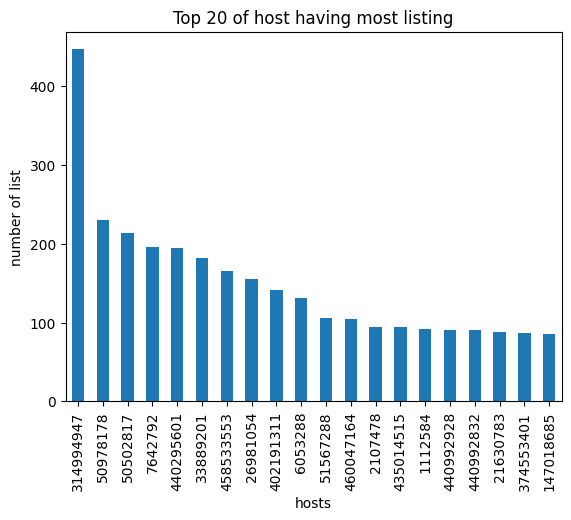

In [32]:
listings_count = df1['host_id'].value_counts()

top_20_hosts = listings_count.nlargest(20)

top_20_hosts.plot(kind='bar')


plt.title('Top 20 of host having most listing')
plt.xlabel('hosts')
plt.ylabel('number of list')


plt.show()

### show the top 20 host having the most hotels

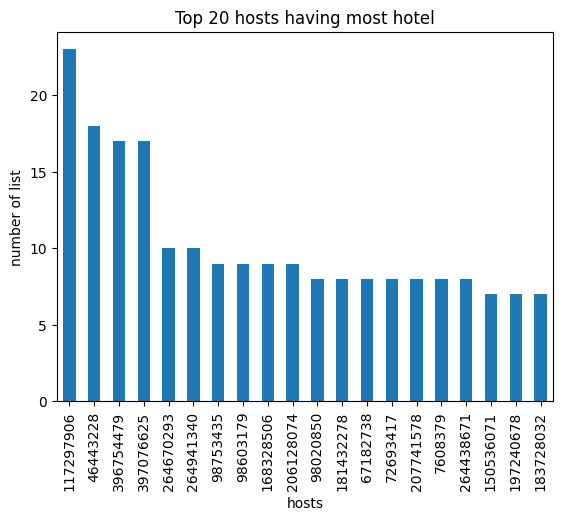

In [33]:
hotel_df = df1[df1['room_type'] == 'Hotel room']

listings_count = hotel_df['host_id'].value_counts()

top_20_hosts = listings_count.nlargest(20)

top_20_hosts.plot(kind='bar')


plt.title('Top 20 hosts having most hotel')
plt.xlabel('hosts')
plt.ylabel('number of list')


plt.show()

### Top 20 Neighbourhood in Paris having the most of listing

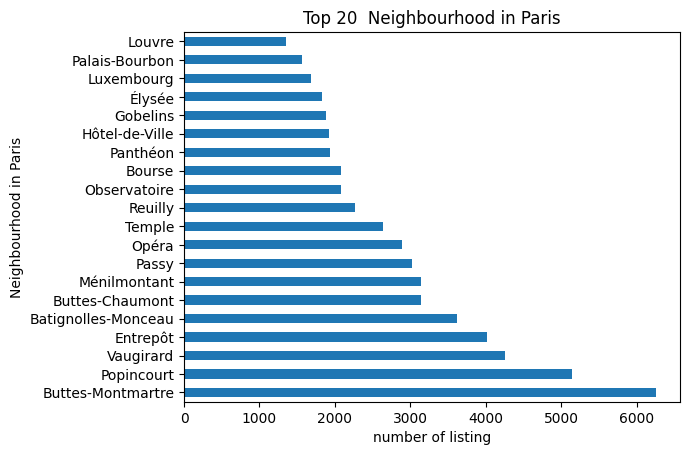

In [34]:
neighbourhoodPop = df1.groupby('neighbourhood_cleansed')['id'].count()
neighbourhoodPop.sort_values(ascending=False, inplace=True)
neighbourhoodPop.plot(kind='barh')


plt.title('Top 20  Neighbourhood in Paris')
plt.xlabel('number of listing')
plt.ylabel('Neighbourhood in Paris')

plt.show()

### show mean price in a neighbourhood

In [35]:
neighbourhoodMeanPrice = df1.groupby('neighbourhood_cleansed')['price'].mean()
neighbourhoodMeanPrice.sort_values(ascending=False, inplace=True)
neighbourhoodMeanPrice

neighbourhood_cleansed
Élysée                 318.806575
Luxembourg             255.033254
Palais-Bourbon         253.695652
Louvre                 252.700962
Passy                  229.185931
Hôtel-de-Ville         223.071280
Bourse                 221.398941
Temple                 202.765667
Vaugirard              195.083138
Opéra                  187.090846
Panthéon               186.767755
Batignolles-Monceau    152.992828
Reuilly                152.342870
Entrepôt               147.442150
Popincourt             134.015731
Observatoire           133.406731
Buttes-Chaumont        129.555272
Buttes-Montmartre      121.619451
Gobelins               119.558090
Ménilmontant            97.249442
Name: price, dtype: float64

### show percent of listing by range over 270 days,  180 and 270 days,  90 and 180 jours,  less 84 days

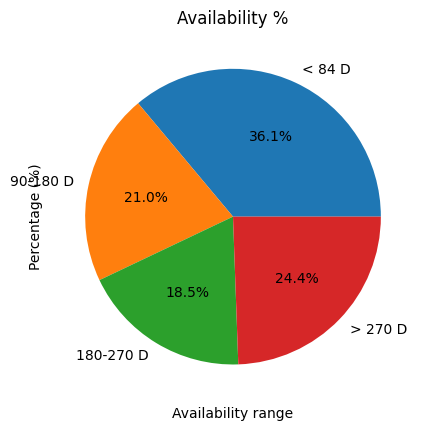

In [36]:
range = [0, 84, 180, 270, 365]


df1['availability_365_range'] = pd.cut(df1['availability_365'], range, labels=['< 84 D', '90-180 D', '180-270 D', '> 270 D'])

availability_percent = df1['availability_365_range'].value_counts(normalize=True) * 100

availability_percent.sort_index().plot(kind='pie',  autopct='%1.1f%%')

plt.title('Availability %')
plt.xlabel('Availability range')
plt.ylabel('Percentage (%)')

plt.show()

### show neighbourhood where less listings in Paris

In [37]:
mostUnpopular = df1.groupby('neighbourhood_cleansed')['id'].count()
mostUnpopular.sort_values(ascending=True,inplace=True)

In [38]:
mostUnpopular.nsmallest(10)

neighbourhood_cleansed
Louvre            1351
Palais-Bourbon    1564
Luxembourg        1684
Élysée            1825
Gobelins          1885
Hôtel-de-Ville    1922
Panthéon          1929
Bourse            2078
Observatoire      2080
Reuilly           2272
Name: id, dtype: int64

### show  total listing for each type listing

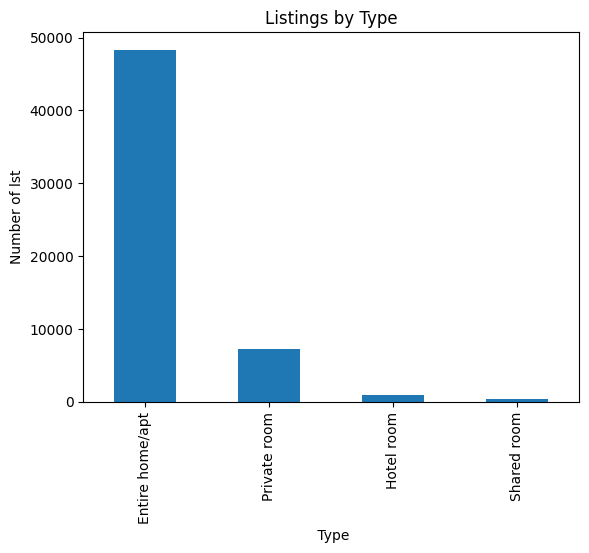

In [39]:
countList = df1['room_type'].value_counts()

countList.plot(kind='bar')

# Set the title and labels
plt.title('Listings by Type')
plt.xlabel(' Type')
plt.ylabel('Number of lst')

# Show the plot
plt.show()

### show  % listing for each type listing

In [40]:
df1['room_type'].value_counts(normalize=True) * 100

room_type
Entire home/apt    85.234284
Private room       12.643232
Hotel room          1.613017
Shared room         0.509467
Name: proportion, dtype: float64

### show number of listings for each type of housing per neighbourhood

In [41]:
pivot_table = df1.pivot_table(index='neighbourhood_cleansed', columns='room_type', values='id', aggfunc='count')

pivot_table

room_type               Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_cleansed                                                        
Batignolles-Monceau                3080          56           474           15
Bourse                             1876          23           174            5
Buttes-Chaumont                    2604           3           492           40
Buttes-Montmartre                  5548          58           637           19
Entrepôt                           3441          40           522           16
Gobelins                           1481          14           379           11
Hôtel-de-Ville                     1735           8           170            9
Louvre                             1143          52           152            4
Luxembourg                         1369          86           227            2
Ménilmontant                       2609          11           496           23
Observatoire                       1671          33           364           12
Opéra                              2282          92           504            6
Palais-Bourbon                     1382          53           124            5
Panthéon                           1607          52           260           10
Passy                              2615          68           325           20
Popincourt                         4525          34           560           30
Reuilly                            1864          24           366           18
Temple                             2443          24           155           11
Vaugirard                          3598          71           561           28
Élysée                             1477         113           230            5

### show number of listings by type in neighbourhood

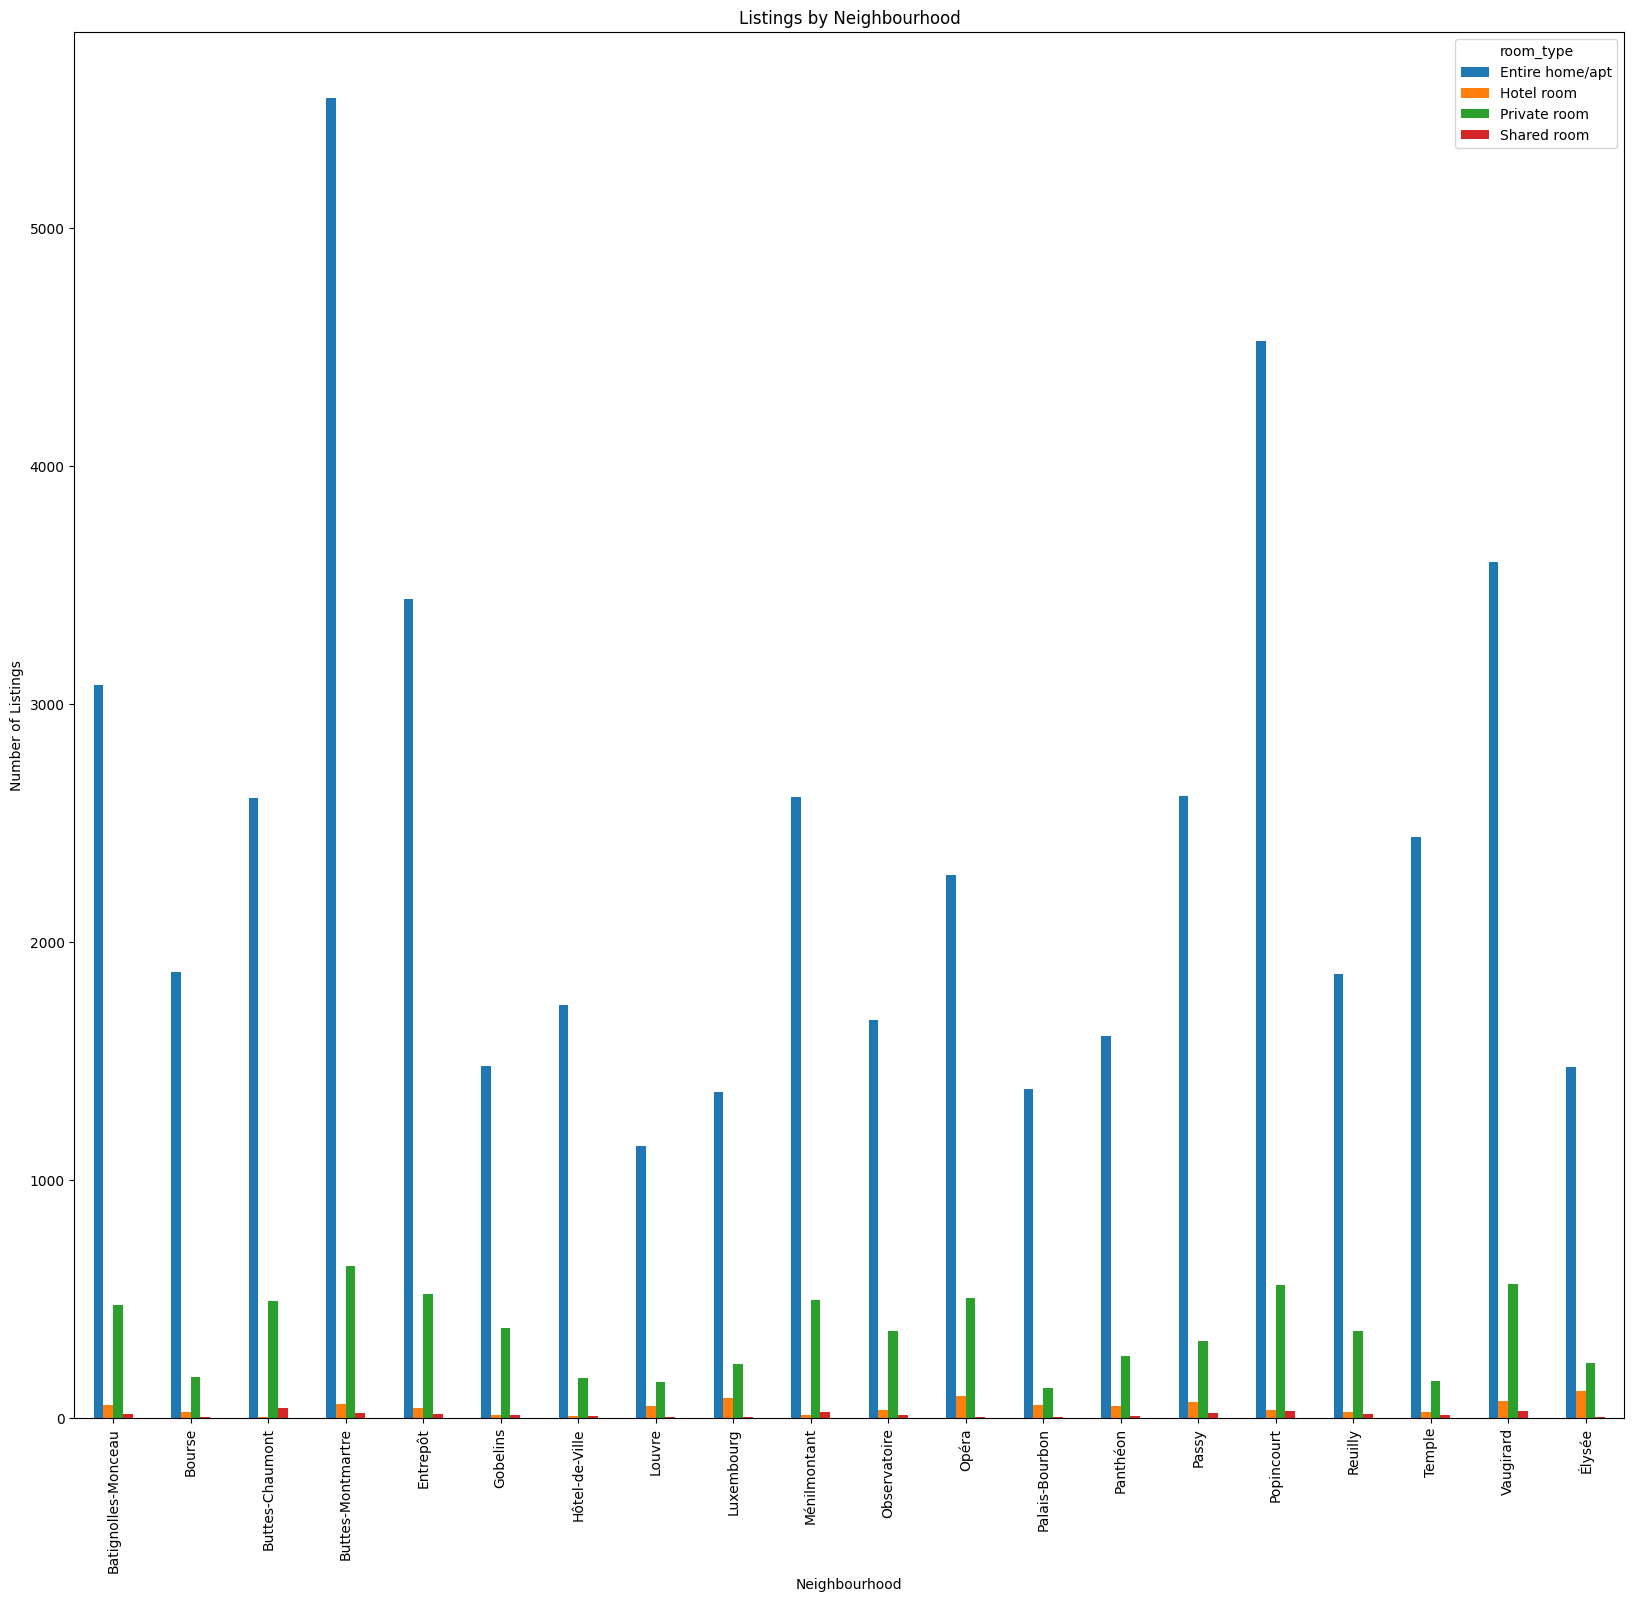

In [42]:
pivot_table.plot(kind='bar', figsize=(20,18))

plt.title('Listings by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')

# Show the plot
plt.show()

### Getting mean price for each type of listing by neighbourhood

In [43]:
pivot_table = df1.pivot_table(index='neighbourhood_cleansed', columns='room_type', values='price', aggfunc='sum')

print(pivot_table)

room_type               Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_cleansed                                                        
Batignolles-Monceau            459542.0     14998.0       74032.0       6027.0
Bourse                         404053.0     11034.0       41949.0       3031.0
Buttes-Chaumont                357654.0      1305.0       42788.0       4927.0
Buttes-Montmartre              672983.0     13243.0       73915.0       1440.0
Entrepôt                       525677.0     14902.0       50977.0       1014.0
Gobelins                       190692.0      4165.0       30012.0        498.0
Hôtel-de-Ville                 394710.0      4880.0       27840.0       1313.0
Louvre                         287805.0     17339.0       36043.0        212.0
Luxembourg                     354243.0     30922.0       44097.0        214.0
Ménilmontant                   267686.0      4696.0       31760.0       1124.0
Observatoire                   223662.0      7755.0 

### show mean price of "Shared room" by neighbourhood

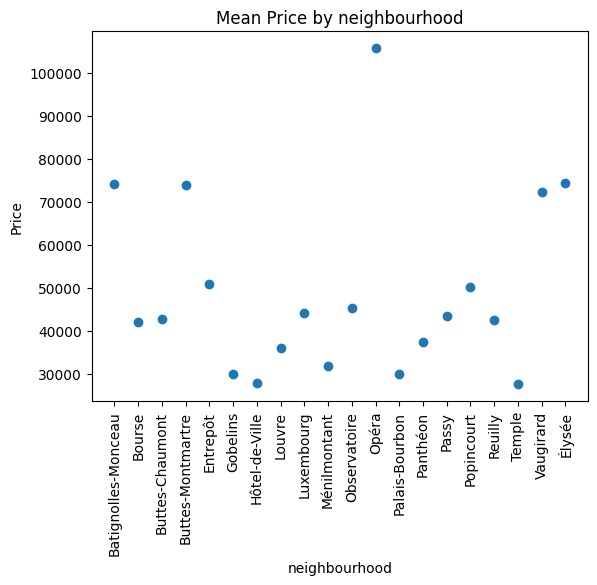

In [44]:
plt.scatter(pivot_table.index, pivot_table['Private room'])


plt.title('Mean Price by neighbourhood')
plt.xlabel('neighbourhood')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()


### show boxplot of Louvre where listings  < 500

In [45]:
louvreLow500 = df1[(df1['neighbourhood_cleansed'] == 'Louvre') & (df1['price'] < 500 )]

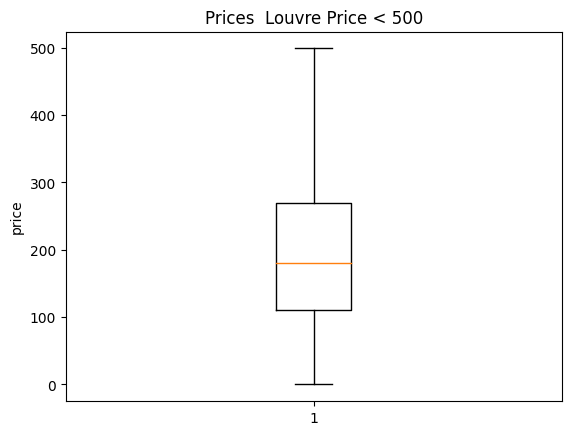

In [46]:
plt.boxplot(louvreLow500['price'])
plt.title('Prices  Louvre Price < 500')
plt.ylabel('price')

# Show the plot
plt.show()

### dynamic graph of neighbourhood map with price in Paris

In [58]:
fig = px.scatter(df1, x='longitude', y='latitude', color='neighbourhood_cleansed', hover_data=['price', 'room_type'])
fig.update_layout(width=1000, height=600)
fig.show()


### Get the 100 listing with the most review Paris

In [59]:
top100review = df1.nlargest(100, 'number_of_reviews')
top100review

id                            listing_url  \
21647  26244787  https://www.airbnb.com/rooms/26244787   
14749  17222007  https://www.airbnb.com/rooms/17222007   
31468  41020735  https://www.airbnb.com/rooms/41020735   
26941  35145338  https://www.airbnb.com/rooms/35145338   
30717  40194697  https://www.airbnb.com/rooms/40194697   
...         ...                                    ...   
9744   10948338  https://www.airbnb.com/rooms/10948338   
2062    2464417   https://www.airbnb.com/rooms/2464417   
9583   10614603  https://www.airbnb.com/rooms/10614603   
18457  21780368  https://www.airbnb.com/rooms/21780368   
2080    2302860   https://www.airbnb.com/rooms/2302860   

                                                    name  \
21647  Double/Twin Room, close to Opera and the Louvr...   
14749    Sweet & cosy room next to Canal Saint Martin ❤️   
31468       Bed in Dorm of 8 Beds "The Big One" in Paris   
26941                             Nice Room for 2 people   
30717  Comfortable bed in shared rooms of 8 in Paris 12e   
...                                                  ...   
9744                Paris je t’aime  ,Montmartre village   
2062                  PARIS 1er CENTER - MUSEE DU LOUVRE   
9583                                Studio in Montmartre   
18457        Beautiful Family Apartment in central Paris   
2080       Appartement cosy Marais - annulation flexible   

                                             description  \
21647  <b>The space</b><br />The Daunou Opera enjoys ...   
14749  The room is located right in the heart of la R...   
31468  Welcome to Les Piaules, our hostel & bar in do...   
26941  Hotel de l'Aqueduc is located near the center ...   
30717  Kick your journey off with a coffee on the 8th...   
...                                                  ...   
9744   Joli appartement rénové de 3 pièces dans le qu...   
2062   This charming Parisian flat, recently renovate...   
9583   Cozy studio, stunning views over the rooftops ...   
18457  (Attention : Voisins sensibles au bruit. Fêtes...   
2080   Cute 2 rooms in the Marais, of 28 m2 / 300 Sq ...   

                                   neighborhood_overview    host_id  \
21647                                                      98020850   
14749  The room I offer is right in the middle of a v...   84901734   
31468  Les Piaules hostel is located in Paris arty & ...  315206797   
26941                                                     264483496   
30717  Make your stay a magic, cocooning and romantic...  309707704   
...                                                  ...        ...   
9744   L'appartement est situé au cœur du village Mon...   50631208   
2062   A few hundred meters from the Opera and the Lo...    6851238   
9583   The area is very close to the Sacre Coeur and ...   54776077   
18457                                                       9304128   
2080   In the heart of the Marais in a very commercia...    8994534   

                                          host_url               host_name  \
21647   https://www.airbnb.com/users/show/98020850                  Lionel   
14749   https://www.airbnb.com/users/show/84901734               Alexandra   
31468  https://www.airbnb.com/users/show/315206797             Les Piaules   
26941  https://www.airbnb.com/users/show/264483496      Hotel De L’Aqueduc   
30717  https://www.airbnb.com/users/show/309707704  The People Paris Bercy   
...                                            ...                     ...   
9744    https://www.airbnb.com/users/show/50631208                 Laurent   
2062     https://www.airbnb.com/users/show/6851238                Victoria   
9583    https://www.airbnb.com/users/show/54776077                Vladimir   
18457    https://www.airbnb.com/users/show/9304128                  Louise   
2080     https://www.airbnb.com/users/show/8994534                 Nicolas   

      neighbourhood_cleansed  latitude  ...  minimum_nights availability_365  \
2164

### get mean price 100 listing with the most of review

In [60]:
top100review['price'].mean()

143.41

### mean price listing with the most review by type of housing

In [61]:
top100review.groupby('room_type')['price'].mean()

room_type
Entire home/apt    157.304348
Hotel room         204.666667
Private room       110.371429
Shared room         43.000000
Name: price, dtype: float64

# data to PostgreSQL bdd

### Connect to our database

In [4]:
connection = psycopg2.connect(user="postgres",
                                  password=passwd,
                                  host="127.0.0.1",
                                  port="5432",
                                  database="AirBnB_Database")


try:
    #execution
    cursor = connection.cursor()
 
    #valider la transaction
    print('connection succes')
except(Exception) as erreur:
    print(erreur)

OperationalError: 